# NLP analysis of some of the past President's acceptance speech as the Democratic/Republican presidential candidate.




- **[John F. Kennedy 1960](https://www.jfklibrary.org/learn/about-jfk/historic-speeches/acceptance-of-democratic-nomination-for-president)**
- **[Ronald Reagan 1980](https://www.c-span.org/video/?c4609012/ronald-reagan-1980-republican-party-nomination-acceptance-speech)**
- **[George H.W. Bush 1988](https://www.c-span.org/video/?3848-1/george-hw-bush-1988-acceptance-speech)**
- **[Barack Obama 2008](https://www.npr.org/templates/story/story.php?storyId=94087570)**


### We do some feature engineering, sentient analysis and try to predict which president would have said a specific sentence. At this time the best accuracy is about 60%. 


`NLP`
`NLTK`
`gridsearchCV`
`RandomForest`
`GradientBoost`


***
Developed by __M.Safaei [L i n k e d i n](https://www.linkedin.com/in/mattsafaei/)__

***
an ongoing project...


In [80]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
pd.set_option('display.max_colwidth', 100)

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
data_Kennedy = open("Kennedy.txt").read()
data_Raegan = open("Raegan.txt").read()
data_Bush = open("Bush.txt").read()
data_Obama = open("Obama.txt").read()

data_all = [data_Kennedy,data_Raegan,data_Bush,data_Obama]

In [82]:
for i in data_all:
    print('number of sentences: {}'.format(len(sent_tokenize(i))))

number of sentences: 127
number of sentences: 217
number of sentences: 299
number of sentences: 226


# Sentiment Analysis

In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

#color code based on compound
def map_colors(a_dict):
    if a_dict['compound'] < 0 : return 41 # negative
    if a_dict['compound'] >0 : return 42 # positive 
    return 47 # neutral

In [84]:
def polarity_print_text(input_file, polarity_list):
    for sentence in sent_tokenize(input_file):
        ss = sid.polarity_scores(sentence)
        print('\033[' + str(map_colors(ss)) + 'm' + sentence + '\033[0m')
        #
        if ss['compound'] < 0:
            polarity_list.append('Negative')
        elif ss['compound'] > 0:
            polarity_list.append('Positive')
        else:
            polarity_list.append('Neutral')
    return polarity_list

# Kennedy's Acceptance Speech:

> #### **<font color=green>Green:</font>** <font color=green>positive sentence</font>
> #### **<font color=red>Red:</font>** <font color=red>negative sentence</font>
> #### **<font color=gray>Gray:</font>** <font color=gray>neutral sentence</font>

In [85]:
polarity_k = []
polarity_print_text(data_Kennedy,polarity_k)

Governor Stevenson, Senator Johnson, Mr. Butler, Senator Symington, Senator Humphrey, Speaker Rayburn, Fellow Democrats, I want to express my thanks to Governor Stevenson for his generous and heart-warming introduction.
It was my great honor to place his name in nomination at the 1956 Democratic Convention, and I am delighted to have his support and his counsel and his advice in the coming months ahead.
With a deep sense of duty and high resolve, I accept your nomination.
I accept it with a full and grateful heart--without reservation-- and with only one obligation--the obligation to devote every effort of body, mind and spirit to lead our Party back to victory and our Nation back to greatness.
I am grateful, too, that you have provided me with such an eloquent statement of our Party's platform.
Pledges which are made so eloquently are made to be kept.
"The Rights of Man"--the civil and economic rights essential to the human dignity of all men--are indeed our goal and our first princip

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Negative',
 'Neutral',
 'Negative',
 'Neutral',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Negative',
 'Positive',
 'Neutral',
 'Negative',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Neutral',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative

# Raegan's speech

In [86]:
polarity_r = []
polarity_print_text(data_Raegan, polarity_r)

Thank you very much.
We're using up prime time.
Thank you very much.
You're singing our song.
Well, the first thrill tonight was to find myself for the first time in a long time in a movie on prime time.
But this, as you can imagine, is the second big thrill.
Mr. Chairman, Mr. Vice-President-to-be, this convention, my fellow citizens of this great nation:

With a deep awareness of the responsibility conferred by your trust, I accept your nomination for the Presidency of the United States.
I do so with deep gratitude.
And I think also I might interject on behalf of all of us our thanks to Detroit and the people of Michigan and to this city for the warm hospitality we've enjoyed.
And I thank you for your wholehearted response to my recommendation in regard to George Bush as the candidate for Vice President.
I'm very proud of our party tonight.
This convention has shown to all America a party united, with positive programs for solving the nation's problems, a party ready to build a new co

['Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Negative',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',

# George H.W. Bush's speech

In [87]:
polarity_b = []
polarity_print_text(data_Bush, polarity_b)

I have many friends to thank tonight.
I thank the voters who supported me.
I thank the gallant men who entered the contest for the presidency this year, and who have honored me with their support.
And, for their kind and stirring words, I thank Governor Tom Kean of New Jersey - Senator Phil Gramm of Texas - President Gerald Ford - and my friend, President Ronald Reagan.
I accept your nomination for President.
I mean to run hard, to fight hard, to stand on the issues - and I mean to win.
There are a lot of great stories in politics about the underdog winning - and this is going to be one of them.
And we're going to win with the help of Senator Dan Quayle of Indiana - a young leader who has become a forceful voice in preparing America's workers for the labor force of the future.
Born in the middle of the century, in the middle of America, and holding the promise of the future - I'm proud to have Dan Quayle at my side.
Many of you have asked, "When will this campaign really begin?"
I have

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Negative',
 'Neutral',
 'Negative',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Po

# Obama's speech

In [88]:
polarity_o = []
polarity_print_text(data_Obama, polarity_o)

To Chairman Dean and my great friend Dick Durbin; and to all my fellow citizens of this great nation; with profound gratitude and great humility, I accept your nomination for the presidency of the United States.
Let me express my thanks to the historic slate of candidates who accompanied me on this journey, and especially the one who traveled the farthest â€” a champion for working Americans and an inspiration to my daughters and to yours â€” Hillary Rodham Clinton.
To President Clinton, who last night made the case for change as only he can make it; to Ted Kennedy, who embodies the spirit of service; and to the next vice president of the United States, Joe Biden, I thank you.
I am grateful to finish this journey with one of the finest statesmen of our time, a man at ease with everyone from world leaders to the conductors on the Amtrak train he still takes home every night.
To the love of my life, our next first lady, Michelle Obama, and to Sasha and Malia â€” I love you so much, and I

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Neutral',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Neutral',
 'Negative',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 '

Text(0.5, 1.0, "Obama's speech")

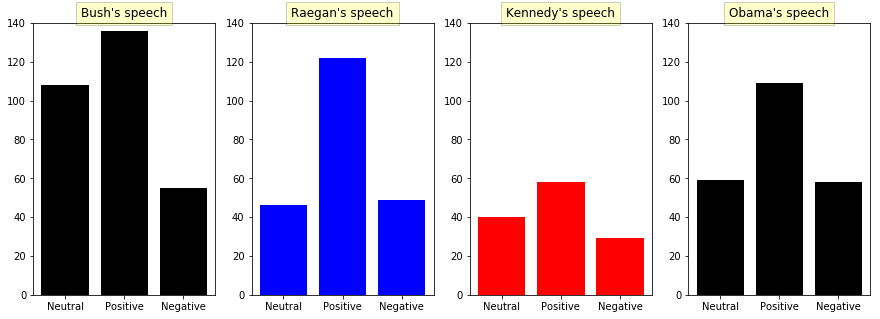

In [89]:
d_b = { x: polarity_b.count(x) for x in list(set(polarity_b))}
d_k = { x: polarity_k.count(x) for x in list(set(polarity_k))}
d_r = { x: polarity_r.count(x) for x in list(set(polarity_r))}
d_o = { x: polarity_o.count(x) for x in list(set(polarity_o))}

box = dict(facecolor='yellow', pad=5, alpha=0.2)

dt = [d_b, d_k, d_r, d_o]
        
fig = plt.figure(figsize=(15,5))

plt.subplot(141)
values = [d_b[i] for i in d_b]
names = [i for i in d_b]
plt.bar(tuple(names), tuple(values) ,color='Black')
plt.ylim([0,140])
plt.title('Bush\'s speech',bbox=box)

plt.subplot(143)
values = [d_k[i] for i in d_k]
names = [i for i in d_k]
plt.bar(tuple(names), tuple(values) ,color='Red')
plt.ylim([0,140])
plt.title('Kennedy\'s speech',bbox=box)

plt.subplot(142)
values = [d_r[i] for i in d_r]
names = [i for i in d_r]
plt.bar(tuple(names), tuple(values) ,color='Blue')
plt.title('Raegan\'s speech',bbox=box)
plt.ylim([0,140])

plt.subplot(144)
values = [d_o[i] for i in d_o]
names = [i for i in d_o]
plt.bar(tuple(names), tuple(values) ,color='Black')
plt.ylim([0,140])
plt.title('Obama\'s speech',bbox=box)



### Raegan's speech

In [90]:
DataFrame_Raegan = pd.DataFrame({
    'Text': sent_tokenize(data_Raegan)
            })
DataFrame_Raegan['Person']=  'Raegan'
DataFrame_Raegan.head(3)

,Text,Person
0,Thank you very much.,Raegan
1,We're using up prime time.,Raegan
2,Thank you very much.,Raegan


### Kennedy's speech

In [91]:
DataFrame_Kennedy = pd.DataFrame({
    'Text': sent_tokenize(data_Kennedy)
                })
DataFrame_Kennedy['Person']=  'Kennedy'
DataFrame_Kennedy.head(3)

,Text,Person
0,"Governor Stevenson, Senator Johnson, Mr. Butler, Senator Symington, Senator Humphrey, Speaker Ra...",Kennedy
1,"It was my great honor to place his name in nomination at the 1956 Democratic Convention, and I a...",Kennedy
2,"With a deep sense of duty and high resolve, I accept your nomination.",Kennedy


### Bush's speech

In [92]:
DataFrame_Bush = pd.DataFrame({
    'Text': sent_tokenize(data_Bush)
                })
DataFrame_Bush['Person']=  'Bush'
DataFrame_Bush.head(3)

,Text,Person
0,I have many friends to thank tonight.,Bush
1,I thank the voters who supported me.,Bush
2,"I thank the gallant men who entered the contest for the presidency this year, and who have honor...",Bush


### Obama's speech

In [93]:
DataFrame_Obama = pd.DataFrame({
    'Text': sent_tokenize(data_Obama)
                })
DataFrame_Obama['Person']=  'Obama'
DataFrame_Obama.head(3)

,Text,Person
0,To Chairman Dean and my great friend Dick Durbin; and to all my fellow citizens of this great na...,Obama
1,"Let me express my thanks to the historic slate of candidates who accompanied me on this journey,...",Obama
2,"To President Clinton, who last night made the case for change as only he can make it; to Ted Ken...",Obama


# Cleaning up the sentences

In [94]:
def clean_text_stem(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text


def clean_text_lemmatize(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [95]:
# DataFrame_Kennedy.drop('body_len', inplace=True, axis=1)

## Create pandas dataframe, tokenize, lemmatize and stemmize

In [96]:
DataFrame_Kennedy['stemmed']     = DataFrame_Kennedy['Text'].apply(lambda x: clean_text_stem(x))
DataFrame_Kennedy['stemmed_len'] = DataFrame_Kennedy['stemmed'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Kennedy['lemmatize']    = DataFrame_Kennedy['Text'].apply(lambda x: clean_text_lemmatize(x))
DataFrame_Kennedy['lemmatize_len'] = DataFrame_Kennedy['lemmatize'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Kennedy.head()

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len
0,"Governor Stevenson, Senator Johnson, Mr. Butler, Senator Symington, Senator Humphrey, Speaker Ra...",Kennedy,"[governor, stevenson, senat, johnson, Mr, butler, senat, symington, senat, humphrey, speaker, ra...",23,"[Governor, Stevenson, Senator, Johnson, Mr, Butler, Senator, Symington, Senator, Humphrey, Speak...",23
1,"It was my great honor to place his name in nomination at the 1956 Democratic Convention, and I a...",Kennedy,"[It, great, honor, place, name, nomin, 1956, democrat, convent, I, delight, support, counsel, ad...",17,"[It, great, honor, place, name, nomination, 1956, Democratic, Convention, I, delighted, support,...",17
2,"With a deep sense of duty and high resolve, I accept your nomination.",Kennedy,"[with, deep, sens, duti, high, resolv, I, accept, nomin]",9,"[With, deep, sense, duty, high, resolve, I, accept, nomination]",9
3,I accept it with a full and grateful heart--without reservation-- and with only one obligation--...,Kennedy,"[I, accept, full, grate, heartwithout, reserv, one, obligationth, oblig, devot, everi, effort, b...",22,"[I, accept, full, grateful, heartwithout, reservation, one, obligationthe, obligation, devote, e...",22
4,"I am grateful, too, that you have provided me with such an eloquent statement of our Party's pla...",Kennedy,"[I, grate, provid, eloqu, statement, parti, platform]",7,"[I, grateful, provided, eloquent, statement, Partys, platform]",7


In [97]:
DataFrame_Raegan['stemmed']     = DataFrame_Raegan['Text'].apply(lambda x: clean_text_stem(x))
DataFrame_Raegan['stemmed_len'] = DataFrame_Raegan['stemmed'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Raegan['lemmatize']    = DataFrame_Raegan['Text'].apply(lambda x: clean_text_lemmatize(x))
DataFrame_Raegan['lemmatize_len'] = DataFrame_Raegan['lemmatize'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Raegan.head()

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len
0,Thank you very much.,Raegan,"[thank, much]",2,"[Thank, much]",2
1,We're using up prime time.,Raegan,"[were, use, prime, time]",4,"[Were, using, prime, time]",4
2,Thank you very much.,Raegan,"[thank, much]",2,"[Thank, much]",2
3,You're singing our song.,Raegan,"[your, sing, song]",3,"[Youre, singing, song]",3
4,"Well, the first thrill tonight was to find myself for the first time in a long time in a movie o...",Raegan,"[well, first, thrill, tonight, find, first, time, long, time, movi, prime, time]",12,"[Well, first, thrill, tonight, find, first, time, long, time, movie, prime, time]",12


In [98]:
DataFrame_Bush['stemmed']     = DataFrame_Bush['Text'].apply(lambda x: clean_text_stem(x))
DataFrame_Bush['stemmed_len'] = DataFrame_Bush['stemmed'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Bush['lemmatize']    = DataFrame_Bush['Text'].apply(lambda x: clean_text_lemmatize(x))
DataFrame_Bush['lemmatize_len'] = DataFrame_Bush['lemmatize'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Bush.head()

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len
0,I have many friends to thank tonight.,Bush,"[I, mani, friend, thank, tonight]",5,"[I, many, friend, thank, tonight]",5
1,I thank the voters who supported me.,Bush,"[I, thank, voter, support]",4,"[I, thank, voter, supported]",4
2,"I thank the gallant men who entered the contest for the presidency this year, and who have honor...",Bush,"[I, thank, gallant, men, enter, contest, presid, year, honor, support]",10,"[I, thank, gallant, men, entered, contest, presidency, year, honored, support]",10
3,"And, for their kind and stirring words, I thank Governor Tom Kean of New Jersey - Senator Phil G...",Bush,"[and, kind, stir, word, I, thank, governor, tom, kean, new, jersey, senat, phil, gramm, texa, pr...",22,"[And, kind, stirring, word, I, thank, Governor, Tom, Kean, New, Jersey, Senator, Phil, Gramm, Te...",22
4,I accept your nomination for President.,Bush,"[I, accept, nomin, presid]",4,"[I, accept, nomination, President]",4


In [99]:
DataFrame_Obama['stemmed']     = DataFrame_Obama['Text'].apply(lambda x: clean_text_stem(x))
DataFrame_Obama['stemmed_len'] = DataFrame_Obama['stemmed'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Obama['lemmatize']    = DataFrame_Obama['Text'].apply(lambda x: clean_text_lemmatize(x))
DataFrame_Obama['lemmatize_len'] = DataFrame_Obama['lemmatize'].apply(lambda x: len(x) - x.count(" "))
DataFrame_Obama.head()

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len
0,To Chairman Dean and my great friend Dick Durbin; and to all my fellow citizens of this great na...,Obama,"[To, chairman, dean, great, friend, dick, durbin, fellow, citizen, great, nation, profound, grat...",21,"[To, Chairman, Dean, great, friend, Dick, Durbin, fellow, citizen, great, nation, profound, grat...",21
1,"Let me express my thanks to the historic slate of candidates who accompanied me on this journey,...",Obama,"[let, express, thank, histor, slate, candid, accompani, journey, especi, one, travel, farthest, ...",22,"[Let, express, thanks, historic, slate, candidate, accompanied, journey, especially, one, travel...",22
2,"To President Clinton, who last night made the case for change as only he can make it; to Ted Ken...",Obama,"[To, presid, clinton, last, night, made, case, chang, make, ted, kennedi, embodi, spirit, servic...",23,"[To, President, Clinton, last, night, made, case, change, make, Ted, Kennedy, embodies, spirit, ...",23
3,"I am grateful to finish this journey with one of the finest statesmen of our time, a man at ease...",Obama,"[I, grate, finish, journey, one, finest, statesmen, time, man, eas, everyon, world, leader, cond...",21,"[I, grateful, finish, journey, one, finest, statesman, time, man, ease, everyone, world, leader,...",21
4,"To the love of my life, our next first lady, Michelle Obama, and to Sasha and Malia â€” I love y...",Obama,"[To, love, life, next, first, ladi, michel, obama, sasha, malia, â, I, love, much, Im, proud]",16,"[To, love, life, next, first, lady, Michelle, Obama, Sasha, Malia, â, I, love, much, Im, proud]",16


In [100]:
dk = DataFrame_Kennedy.copy()
dr = DataFrame_Raegan.copy()
db = DataFrame_Bush.copy()
do = DataFrame_Obama.copy()

dts = [dk, dr, db, do]

In [101]:
Num_words_per_sent = 5
for dt in dts:
    print(dt.loc[0,'Person'],dt[dt['stemmed_len']> Num_words_per_sent][['stemmed_len']].count()[0],dt[dt['stemmed_len']> Num_words_per_sent][['lemmatize_len']].count()[0] ,end='\n')

Kennedy 96 96
Raegan 178 178
Bush 177 177
Obama 168 168


In [102]:
condition= (dk['lemmatize_len'] > 5) & (dk['lemmatize_len'] < 50)
dk.where(condition,inplace=False).dropna().head(2)
print(dk.where(cond=condition,inplace=False).dropna().shape)

(95, 6)


In [103]:
dk.sample(n=3,random_state=42).shape

(3, 6)

### To require a minimum number of key words in the sentence 

In [104]:
# lets see how many lines in each speech is having minimum of 5 stemmed or lemmatized words
for d in dts:
    bad_rows = [row for row in d.index if d.loc[row,'lemmatize_len']< 3 ]
    print('remaining rows for person {} before was : {} and now is {}'.format(d['Person'].loc[1],len(d), len(d.drop(bad_rows))))
    

remaining rows for person Kennedy before was : 127 and now is 121
remaining rows for person Raegan before was : 217 and now is 207
remaining rows for person Bush before was : 299 and now is 276
remaining rows for person Obama before was : 226 and now is 217


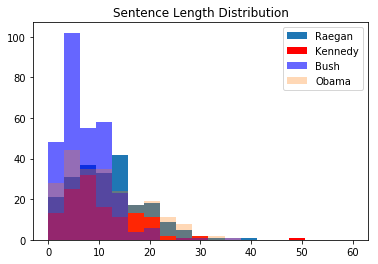

In [107]:
# histogram
import numpy as np
bins = np.linspace(0, 60, 20)
plt.hist(dr['lemmatize_len'], bins, alpha=1, density=False, label='Raegan')
plt.hist(dk['lemmatize_len'], bins, alpha=1, density=False, label='Kennedy', color= 'red')
plt.hist(db['lemmatize_len'], bins, alpha=0.6, density=False, label='Bush', color='b')
plt.hist(do['lemmatize_len'], bins, alpha=0.3, density=False, label='Obama')
plt.title("Sentence Length Distribution")
plt.legend(loc='upper right')
plt.show()

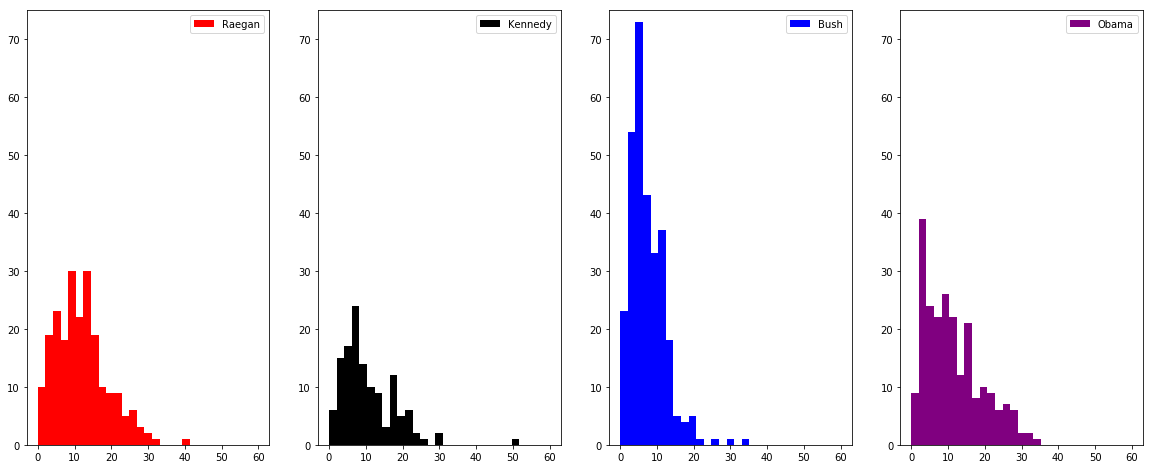

In [108]:
import numpy as np
columns = 'lemmatize_len'
normed = False
ymax = 75

bins = np.linspace(0, 60, 30)

fig = plt.figure(figsize=(20,8))
plt.subplot(141)
plt.hist(dr[columns], bins = bins, density=normed, label='Raegan', color='Red')
plt.ylim([0, ymax])
plt.legend(loc='upper right')
plt.subplot(142)
plt.hist(dk[columns], bins =bins, density=normed, label ='Kennedy', color ='black')
plt.ylim([0, ymax])
plt.legend(loc='upper right')
plt.subplot(143)
plt.hist(db[columns], bins =bins, density=normed, label ='Bush', color ='Blue')
plt.ylim([0, ymax])
plt.legend(loc='upper right')
plt.subplot(144)
plt.hist(do[columns], bins =bins, density=normed, label ='Obama', color ='purple')
plt.ylim([0, ymax])
plt.legend(loc='upper right')
# fig.tight_layout()
plt.show()
condition= (dk['lemmatize_len'] > 5) & (dk['lemmatize_len'] < 50)
dk.where(condition,inplace=False).dropna().head(2)

fig.savefig("test.png")

In [109]:
# remove very short sentences from all speeches
for d in [dk, dr, db, do]:
    d.where(d['lemmatize_len'] >= 3,inplace=True)
    d.dropna(inplace=True)

In [110]:
# The new dataframes have this number of sentences
[len(d) for d in dts]

[121, 207, 276, 217]

In [111]:
num_sents = min([len(d) for d in dts])

In [112]:
# remove very short sentences from all speeches by randomly choosing num_sents from each database
dk = dk.sample(n=num_sents,random_state=42).reset_index(drop=True).copy() 
dr = dr.sample(n=num_sents,random_state=42).reset_index(drop=True).copy()
db = db.sample(n=num_sents,random_state=42).reset_index(drop=True).copy()
do = do.sample(n=num_sents,random_state=42).reset_index(drop=True).copy()

In [113]:
db.shape

(121, 6)

In [114]:
db.head()

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len
0,But I am here tonight - and I am your candidate - because the most important work of my life is ...,Bush,"[but, I, tonight, I, candid, import, work, life, complet, mission, start, 1980]",12.0,"[But, I, tonight, I, candidate, important, work, life, complete, mission, started, 1980]",12.0
1,I hate war.,Bush,"[I, hate, war]",3.0,"[I, hate, war]",3.0
2,"""Zero tolerance"" isn't just a policy, it's an attitude.",Bush,"[zero, toler, isnt, polici, attitud]",5.0,"[Zero, tolerance, isnt, policy, attitude]",5.0
3,"Our economy is strong but not invulnerable, and the peace is broad but can be broken.",Bush,"[our, economi, strong, invulner, peac, broad, broken]",7.0,"[Our, economy, strong, invulnerable, peace, broad, broken]",7.0
4,"We're on a journey to a new century, and we've got to leave the tired old baggage of bigotry beh...",Bush,"[were, journey, new, centuri, weve, got, leav, tire, old, baggag, bigotri, behind]",12.0,"[Were, journey, new, century, weve, got, leave, tired, old, baggage, bigotry, behind]",12.0


# Text Vectorization using tf-idf and preparing features and lables for model trainig
## Work based on stemmed or lemmatized
## keep 80% for training and rest for final test evaluation


## Tokenization

In [115]:
# define clean function
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [116]:
# Join all dataframes together to train the model

## Bundle all data into one dataframe and then shuffle couple of times

In [117]:
big_data = pd.concat([dk, db,dr,do], axis =0)
big_data.shape

(484, 6)

### Shuffle the rows using 100% sampling without replacement and resetting the index

In [118]:
# let's shuffle three times
big_data = big_data.sample(frac=1,replace=False, random_state=42).reset_index(drop=True)
big_data = big_data.sample(frac=1,replace=False, random_state=42).reset_index(drop=True)
big_data = big_data.sample(frac=1,replace=False, random_state=42).reset_index(drop=True)
big_data

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len
0,This is a Platform on which I can run with enthusiasm and conviction.,Kennedy,"[thi, platform, I, run, enthusiasm, convict]",6.0,"[This, Platform, I, run, enthusiasm, conviction]",6.0
1,That's not the judgment we need.,Obama,"[that, judgment, need]",3.0,"[Thats, judgment, need]",3.0
2,"America, now is not the time for small plans.",Obama,"[america, time, small, plan]",4.0,"[America, time, small, plan]",4.0
3,"One-third of the world, it has been said, may be free- -but one-third is the victim of cruel rep...",Kennedy,"[onethird, world, said, may, free, onethird, victim, cruel, repressionand, one, third, rock, pan...",16.0,"[Onethird, world, said, may, free, onethird, victim, cruel, repressionand, one, third, rocked, p...",16.0
4,Our task is not merely one of itemizing Republican failures.,Kennedy,"[our, task, mere, one, item, republican, failur]",7.0,"[Our, task, merely, one, itemizing, Republican, failure]",7.0
5,"And so I know that what it all comes down to, this election - what it all comes down to, after a...",Bush,"[and, I, know, come, elect, come, shout, cheer, man, desk]",10.0,"[And, I, know, come, election, come, shouting, cheer, man, desk]",10.0
6,"As for me, I have held high office and done the work of democracy day by day.",Bush,"[As, I, held, high, offic, done, work, democraci, day, day]",10.0,"[As, I, held, high, office, done, work, democracy, day, day]",10.0
7,Weakness and ambivalence lead to war.,Bush,"[weak, ambival, lead, war]",4.0,"[Weakness, ambivalence, lead, war]",4.0
8,"In the Republicans who never thought they'd pick up a Democratic ballot, but did.",Obama,"[In, republican, never, thought, theyd, pick, democrat, ballot]",8.0,"[In, Republicans, never, thought, theyd, pick, Democratic, ballot]",8.0
9,That is the question of the New Frontier.,Kennedy,"[that, question, new, frontier]",4.0,"[That, question, New, Frontier]",4.0


### Add the length of raw sentence as a feature to the model

In [119]:
big_data['text_len'] = big_data['Text'].apply(lambda x: len(x) - x.count(" "))
big_data.head()

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len,text_len
0,This is a Platform on which I can run with enthusiasm and conviction.,Kennedy,"[thi, platform, I, run, enthusiasm, convict]",6.0,"[This, Platform, I, run, enthusiasm, conviction]",6.0,57
1,That's not the judgment we need.,Obama,"[that, judgment, need]",3.0,"[Thats, judgment, need]",3.0,27
2,"America, now is not the time for small plans.",Obama,"[america, time, small, plan]",4.0,"[America, time, small, plan]",4.0,37
3,"One-third of the world, it has been said, may be free- -but one-third is the victim of cruel rep...",Kennedy,"[onethird, world, said, may, free, onethird, victim, cruel, repressionand, one, third, rock, pan...",16.0,"[Onethird, world, said, may, free, onethird, victim, cruel, repressionand, one, third, rocked, p...",16.0,149
4,Our task is not merely one of itemizing Republican failures.,Kennedy,"[our, task, mere, one, item, republican, failur]",7.0,"[Our, task, merely, one, itemizing, Republican, failure]",7.0,51


### Double check if sampling took all databases correctly

In [120]:
big_data[big_data['Person']=='Raegan'].count()==big_data[big_data['Person']=='Kennedy'].count()

Text             True
Person           True
stemmed          True
stemmed_len      True
lemmatize        True
lemmatize_len    True
text_len         True
dtype: bool

### Here is when the train_test split is happening

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(big_data[['Text', 'text_len', 'stemmed_len']],
                                                    big_data['Person'], test_size=0.2)

In [122]:
# see the actual number of senteces for train and test
print('train: {} \ntest:  {}'.format(X_train.shape, X_test.shape))

train: (387, 3) 
test:  (97, 3)


### The index for `pd.DataFrame(tfidf_train.toarray())]` starts from 0 unlike the `X_train[['text_len', 'stemmed_len']]` which has the original index, therefore we have to reset the index for `X_train[['text_len', 'stemmed_len']]`

In [123]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['Text'])

tfidf_train = tfidf_vect_fit.transform(X_train['Text'])
tfidf_test = tfidf_vect_fit.transform(X_test['Text'])

X_train_vect = pd.concat([X_train[['text_len', 'stemmed_len']].reset_index(drop=True), 
                          pd.DataFrame(tfidf_train.toarray())], axis=1)

X_test_vect = pd.concat([X_test[['text_len', 'stemmed_len']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,text_len,stemmed_len,0,1,2,3,4,5,6,7,...,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527
0,200,20.0,0.0,0.0,0.0,0.0,0.0,0.236066,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33,5.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,81,10.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,77,9.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35,5.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
y_train.head()

35     Kennedy
323       Bush
294       Bush
422     Raegan
136       Bush
Name: Person, dtype: object

In [125]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

In [127]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)


print('Fit time',round(pred_time,3))
print('precision',round(precision_score(y_test, y_pred,average='micro'),3))
print('accuracy_score',round(precision_score(y_test, y_pred,average='micro'),3))    
print('recall_score',round(precision_score(y_test, y_pred,average='micro'),3))    

Fit time 0.116
precision 0.536
accuracy_score 0.536
recall_score 0.536


### Exploring parameter settings using GridSearchCV

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [129]:
# to suspend the future warnings that can be troublesome specially for MLP
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [130]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train_vect, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
11,1.376401,0.057039,0.051895,0.003201,None,300,"{'max_depth': None, 'n_estimators': 300}",0.481013,0.417722,0.551282,...,0.485788,0.046552,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,1.442073,0.031119,0.055018,0.007040,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.468354,0.392405,0.551282,...,0.480620,0.053232,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.782541,0.037463,0.030997,0.003955,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.455696,0.443038,0.500000,...,0.478036,0.024274,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,1.561801,0.102760,0.055439,0.007374,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.481013,0.405063,0.512821,...,0.475452,0.041563,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,1.232400,0.037307,0.053910,0.005742,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.443038,0.443038,0.487179,...,0.472868,0.028900,5,0.980519,0.967532,0.980583,0.951768,0.990385,0.974158,0.013343


In [131]:
gs_fit.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
from sklearn.model_selection import KFold, cross_val_score

In [133]:
rf = gs_fit.best_estimator_
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_train_vect, y_train, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.46153846, 0.42307692, 0.53246753, 0.45454545, 0.50649351])

# Focus on negative statements

In [134]:
sentients =[]
for row in range(len(big_data)):
    ss = sid.polarity_scores(big_data.loc[row, 'Text'])
    if ss['compound'] < 0 : 
        sentients.append(-1)
    elif ss['compound'] > 0:
        sentients.append(1)
    else:
        sentients.append(0)
sentients[:100]
big_data['POSITIVITY'] = sentients
big_data.head()

,Text,Person,stemmed,stemmed_len,lemmatize,lemmatize_len,text_len,POSITIVITY
0,This is a Platform on which I can run with enthusiasm and conviction.,Kennedy,"[thi, platform, I, run, enthusiasm, convict]",6.0,"[This, Platform, I, run, enthusiasm, conviction]",6.0,57,1
1,That's not the judgment we need.,Obama,"[that, judgment, need]",3.0,"[Thats, judgment, need]",3.0,27,0
2,"America, now is not the time for small plans.",Obama,"[america, time, small, plan]",4.0,"[America, time, small, plan]",4.0,37,0
3,"One-third of the world, it has been said, may be free- -but one-third is the victim of cruel rep...",Kennedy,"[onethird, world, said, may, free, onethird, victim, cruel, repressionand, one, third, rock, pan...",16.0,"[Onethird, world, said, may, free, onethird, victim, cruel, repressionand, one, third, rocked, p...",16.0,149,-1
4,Our task is not merely one of itemizing Republican failures.,Kennedy,"[our, task, mere, one, item, republican, failur]",7.0,"[Our, task, merely, one, itemizing, Republican, failure]",7.0,51,-1


In [135]:
del X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(big_data[['Text', 'text_len', 'stemmed_len', 'POSITIVITY']],
                                                    big_data['Person'], test_size=0.2)

In [136]:
# see the actual number of senteces for train and test
print('train: {} \ntest:  {}'.format(X_train.shape, X_test.shape))

train: (387, 4) 
test:  (97, 4)


In [137]:
### The index for `pd.DataFrame(tfidf_train.toarray())]` starts from 0 unlike the `X_train[['text_len', 'stemmed_len']]` which has the original index, therefore we have to reset the index for `X_train[['text_len', 'stemmed_len']]`

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['Text'])

tfidf_train = tfidf_vect_fit.transform(X_train['Text'])
tfidf_test = tfidf_vect_fit.transform(X_test['Text'])

X_train_vect = pd.concat([X_train[['text_len', 'stemmed_len', 'POSITIVITY']].reset_index(drop=True), 
                          pd.DataFrame(tfidf_train.toarray())], axis=1)

X_test_vect = pd.concat([X_test[['text_len', 'stemmed_len', 'POSITIVITY']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,text_len,stemmed_len,POSITIVITY,0,1,2,3,4,5,6,...,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532
0,270,27.0,-1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,133,15.0,1,0.0,0.300344,0.0,0.0,0.0,0.0,0.0,...,0.280915,0.0,0.173886,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,115,12.0,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70,7.0,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47,5.0,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
rf       = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train_vect, y_train)
y_pred   = rf_model.predict(X_test_vect)

In [139]:
print('Fit time',round(pred_time,3))
print('precision',round(precision_score(y_test, y_pred,average='micro'),3))
print('accuracy_score',round(precision_score(y_test, y_pred,average='micro'),3))    
print('recall_score',round(precision_score(y_test, y_pred,average='micro'),3))    

Fit time 0.116
precision 0.515
accuracy_score 0.515
recall_score 0.515


In [140]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train_vect, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
11,0.866093,0.223077,0.035917,0.007679,None,300,"{'max_depth': None, 'n_estimators': 300}",0.645570,0.538462,0.512821,...,0.532300,0.069600,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,1.163515,0.209431,0.041575,0.007524,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.556962,0.538462,0.512821,...,0.524548,0.031982,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.664670,0.016660,0.028571,0.003211,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.645570,0.474359,0.487179,...,0.521964,0.066588,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,1.290309,0.020799,0.050282,0.005087,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.620253,0.512821,0.512821,...,0.521964,0.057384,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
10,0.475929,0.129769,0.021457,0.004291,None,150,"{'max_depth': None, 'n_estimators': 150}",0.594937,0.512821,0.474359,...,0.519380,0.040582,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [141]:
print('Fit time',round(pred_time,3))
print('precision',round(precision_score(y_test, y_pred,average='macro'),3))
print('accuracy_score',round(precision_score(y_test, y_pred,average='macro'),3))    
print('recall_score',round(precision_score(y_test, y_pred,average='macro'),3))    

Fit time 0.116
precision 0.535
accuracy_score 0.535
recall_score 0.535


In [142]:
gs_fit.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [143]:
rf_model = gs_fit.best_estimator_.fit(X_train_vect, y_train)
y_pred   = rf_model.predict(X_test_vect)

print('Fit time',round(pred_time,3))
print('precision',round(precision_score(y_test, y_pred,average='macro'),3))
print('accuracy_score',round(precision_score(y_test, y_pred,average='macro'),3))    
print('recall_score',round(precision_score(y_test, y_pred,average='macro'),3))    

Fit time 0.116
precision 0.571
accuracy_score 0.571
recall_score 0.571


# K-Fold Cross Validation

In [144]:
rf = gs_fit.best_estimator_
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_train_vect, y_train, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.66666667, 0.46153846, 0.45454545, 0.41558442, 0.50649351])

In [145]:
# gs_fit.best_estimator_.predict(X_test_vect)== y_test

In [146]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

In [147]:
print('Fit time',round(pred_time,3))
print('precision',round(precision_score(y_test, y_pred,average='macro'),3))
print('accuracy_score',round(precision_score(y_test, y_pred,average='macro'),3))    
print('recall_score',round(precision_score(y_test, y_pred,average='macro'),3))    

Fit time 0.006
precision 0.478
accuracy_score 0.478
recall_score 0.478


#### Gradient Boost 

In [148]:
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(X_train_vect, y_train)
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.554670,0.306839,0.007779,0.002632,0.1,7,50,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}",0.531646,0.487179,...,0.501292,0.016912,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,18.351540,0.664587,0.008578,0.001353,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}",0.493671,0.461538,...,0.478036,0.010462,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,28.331301,0.913046,0.009774,0.001163,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150}",0.518987,0.461538,...,0.478036,0.023428,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,12.911269,0.839157,0.007380,0.000798,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}",0.506329,0.461538,...,0.475452,0.018024,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,18.939644,1.246953,0.007779,0.000399,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}",0.518987,0.461538,...,0.465116,0.036104,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [151]:
cv_fit.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [152]:
y_pred =  cv_fit.best_estimator_.predict(X_test_vect)

print('Fit time',round(pred_time,3))
print('precision',round(precision_score(y_test, y_pred,average='macro'),3))
print('accuracy_score',round(precision_score(y_test, y_pred,average='macro'),3))    
print('recall_score',round(precision_score(y_test, y_pred,average='macro'),3))    

Fit time 0.006
precision 0.485
accuracy_score 0.485
recall_score 0.485
